In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
train_labels[10]

3

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
  





x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results



one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [ ]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 154us/step - loss: 2.5471 - acc: 0.5340 - val_loss: 1.7280 - val_acc: 0.6710
Epoch 2/20
7982/7982 [==============================] - 1s 121us/step - loss: 1.4248 - acc: 0.7131 - val_loss: 1.3354 - val_acc: 0.7130
Epoch 3/20
7982/7982 [==============================] - 1s 122us/step - loss: 1.0673 - acc: 0.7741 - val_loss: 1.1387 - val_acc: 0.7530
Epoch 4/20
7982/7982 [==============================] - 1s 120us/step - loss: 0.8347 - acc: 0.8227 - val_loss: 1.0782 - val_acc: 0.7450
Epoch 5/20
7982/7982 [==============================] - 1s 119us/step - loss: 0.6607 - acc: 0.8578 - val_loss: 0.9513 - val_acc: 0.8000
Epoch 6/20
7982/7982 [==============================] - 1s 121us/step - loss: 0.5224 - acc: 0.8933 - val_loss: 0.9125 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 1s 120us/step - loss: 0.4194 - acc: 0.9117 - val_loss: 0.8877 - val_acc: 0.8090


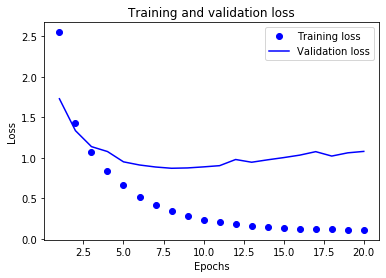

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

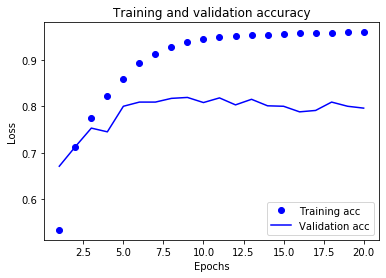

In [ ]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=8,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 161us/step - loss: 2.5333 - acc: 0.5093 - val_loss: 1.7128 - val_acc: 0.6230
Epoch 2/8
7982/7982 [==============================] - 1s 120us/step - loss: 1.4141 - acc: 0.6948 - val_loss: 1.3419 - val_acc: 0.7080
Epoch 3/8
7982/7982 [==============================] - 1s 120us/step - loss: 1.0631 - acc: 0.7712 - val_loss: 1.1842 - val_acc: 0.7440
Epoch 4/8
7982/7982 [==============================] - 1s 118us/step - loss: 0.8374 - acc: 0.8208 - val_loss: 1.0602 - val_acc: 0.7690
Epoch 5/8
7982/7982 [==============================] - 1s 119us/step - loss: 0.6585 - acc: 0.8594 - val_loss: 0.9763 - val_acc: 0.7910
Epoch 6/8
7982/7982 [==============================] - 1s 122us/step - loss: 0.5228 - acc: 0.8886 - val_loss: 0.9408 - val_acc: 0.8030
Epoch 7/8
7982/7982 [==============================] - 1s 121us/step - loss: 0.4196 - acc: 0.9118 - val_loss: 0.9083 - val_acc: 0.8240
Epoch 8

In [ ]:
results

[0.9590208381812485, 0.7934105076220879]

In [ ]:
model.metrics_names

['loss', 'acc']

In [ ]:
model.evaluate()


['accuracy']